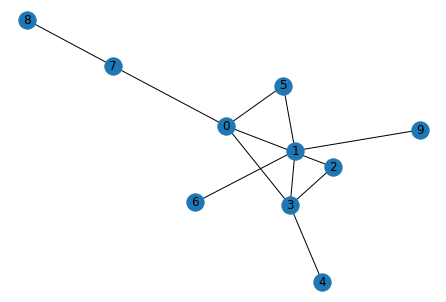

In [1]:
import networkx as nx
from copy import deepcopy
random_graph = None
while random_graph == None or (not nx.is_connected(random_graph)):
    random_graph = nx.extended_barabasi_albert_graph(10,1,0.2,0.1)
lbd = {i:i for i in range(10)}
nx.draw(random_graph, labels=lbd)

In [2]:
random_graph.degree

DegreeView({0: 4, 1: 4, 2: 2, 3: 4, 4: 1, 5: 2, 6: 1, 7: 2, 8: 1, 9: 1})

In [3]:
min(random_graph.degree, key=lambda t: t[1])

(4, 1)

In [4]:
accepted_turns = set()
abolished_turns = set()
g = deepcopy(random_graph)
while g.number_of_nodes() > 1:
    # choose the node with min degree
    node_selected = min(g.degree, key=lambda k: k[1])
    print(g.degree)
    print(node_selected)
    node_selected = node_selected[0]
    adjs = sorted(list(g.neighbors(node_selected)))
    # abandont turns that may creat circles by the chosen node
    adj_cnt = len(adjs)
    for i in range(adj_cnt):
        for j in range(i + 1, adj_cnt):
            turn = (adjs[i], node_selected, adjs[j])
            abolished_turns.add(turn)
    adjs = set(adjs)
    # add turns to remain connectivity when deleting chosen node
    for adj in adjs:
        adjadjs = set(g.neighbors(adj))
        for adjadj in adjadjs:
            if adjadj == node_selected or adjadj:
                continue
            f = node_selected
            t = adjadj
            if f > t:
                t = node_selected
                f = adjadj
            turn = (f, adj, t)
            accepted_turns.add(turn)
    # remove the chosen node and it's related edges
    g.remove_node(node_selected)

[(0, 4), (1, 4), (2, 2), (3, 4), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1)]
(4, 1)
[(0, 4), (1, 4), (2, 2), (3, 3), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1)]
(6, 1)
[(0, 4), (1, 3), (2, 2), (3, 3), (5, 2), (7, 2), (8, 1), (9, 1)]
(8, 1)
[(0, 4), (1, 3), (2, 2), (3, 3), (5, 2), (7, 1), (9, 1)]
(7, 1)
[(0, 3), (1, 3), (2, 2), (3, 3), (5, 2), (9, 1)]
(9, 1)
[(0, 3), (1, 2), (2, 2), (3, 3), (5, 2)]
(1, 2)
[(0, 3), (2, 2), (3, 2), (5, 1)]
(5, 1)
[(0, 2), (2, 2), (3, 2)]
(0, 2)
[(2, 1), (3, 1)]
(2, 1)


In [5]:
print(accepted_turns)
print(abolished_turns)

{(0, 3, 4), (0, 7, 8), (0, 5, 1), (0, 3, 1)}
{(3, 1, 5), (2, 0, 3)}


In [6]:
cg = random_graph
for i in range(cg.number_of_nodes()):
    tg = deepcopy(cg)
    tg.remove_node(i)
    sub_graph_cnt = nx.number_connected_components(tg)
    print(sub_graph_cnt)
    if sub_graph_cnt > 1:
        tg = deepcopy(cg)
        cons = list(tg.neighbors(i))
        edg_cnt = len(cons)
        if sub_graph_cnt == edg_cnt:
            print("all deleted edges are special edges")
            continue
        for con_idx in cons:
            if edg_cnt == sub_graph_cnt:
                break
            tg.remove_edge(con_idx, i)
            if nx.is_connected(tg):
                edg_cnt -= 1
            else:
                tg.add_edge(con_idx, i)
        for sp_no in tg.neighbors(i):
            print("special link ({}, {})".format(sp_no, i))

2
special link (7, 0)
special link (5, 0)
3
special link (5, 1)
special link (6, 1)
special link (9, 1)
1
2
special link (1, 3)
special link (4, 3)
1
1
1
2
all deleted edges are special edges
1
1


In [7]:
def TP(G=nx.Graph()):
    

IndentationError: expected an indented block (<ipython-input-7-b94821036779>, line 2)

In [1]:
from turn_prohibition import gen_test_case1, gen_test_case2

tg1 = gen_test_case1()
tg2 = gen_test_case2()

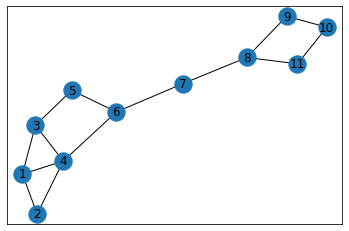

In [10]:
import networkx as nx
nx.draw_networkx(tg1)

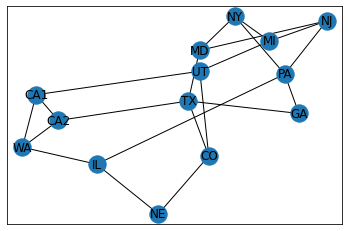

In [9]:
nx.draw_networkx(tg2,labels={k:l for k,l in list(tg2.nodes(data='label'))})